In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as immg
import os
import cv2
import shutil
from PIL import Image
from fastai.vision import *
from tqdm.notebook import tqdm,tnrange
from pathlib import Path
sns.set_style('darkgrid')

In [2]:
path = Path('/kaggle/input/semantic-drone-dataset/semantic_drone_dataset')

In [3]:
path_lbl = path/'label_images_semantic'
path_img = path/'original_images'
get_y_fn = lambda x: path_lbl/f'{x.stem}.png'

In [4]:
path.ls()

[PosixPath('/kaggle/input/semantic-drone-dataset/semantic_drone_dataset/original_images'),
 PosixPath('/kaggle/input/semantic-drone-dataset/semantic_drone_dataset/label_images_semantic')]

In [5]:
fnames = get_files(path/'original_images')
fnames_mask = get_files(path/'label_images_semantic')

In [6]:
os.mkdir('/kaggle/working/train_small/')
os.mkdir('/kaggle/working/label_small/')

In [7]:
def drone_mask(f):  # f = file_name
  img_a = immg.imread(f)
  img_a_mask = immg.imread(get_y_fn(f))
  plt.figure(1,figsize=(20,8))
  plt.subplot(121)
  plt.imshow(img_a);plt.title('Raw Drone footage ');plt.axis('off')
  plt.subplot(122)
  plt.imshow(img_a,alpha=0.8);
  plt.imshow(img_a_mask,alpha=0.8);plt.title('Drone with  mask');plt.axis('off')
  plt.show()

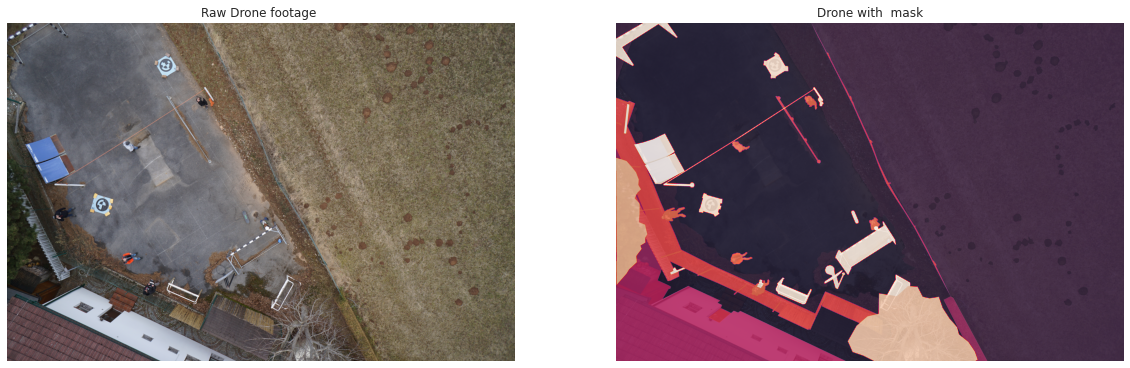

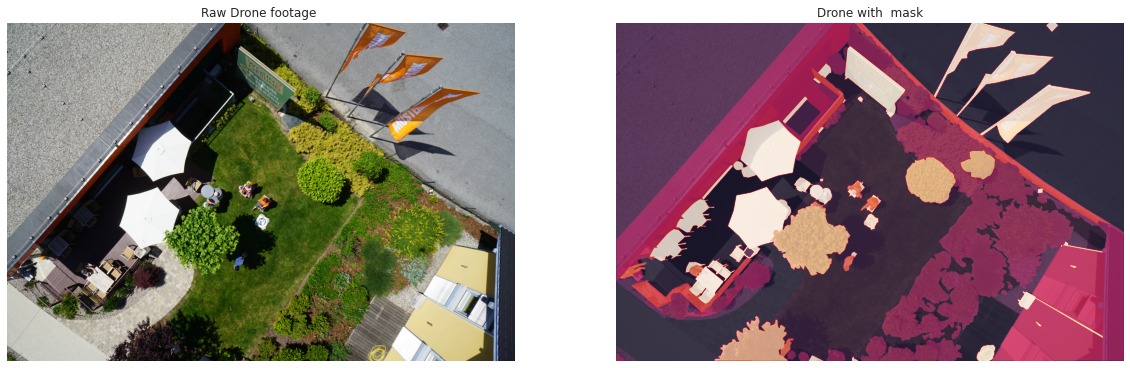

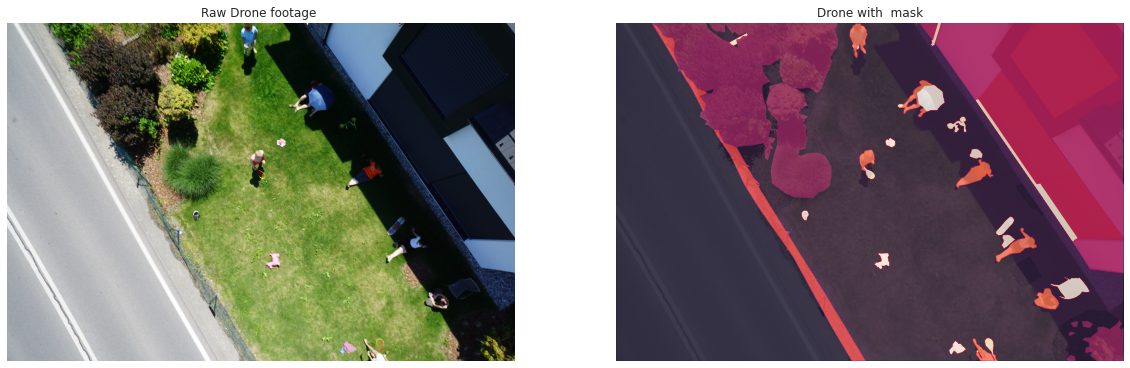

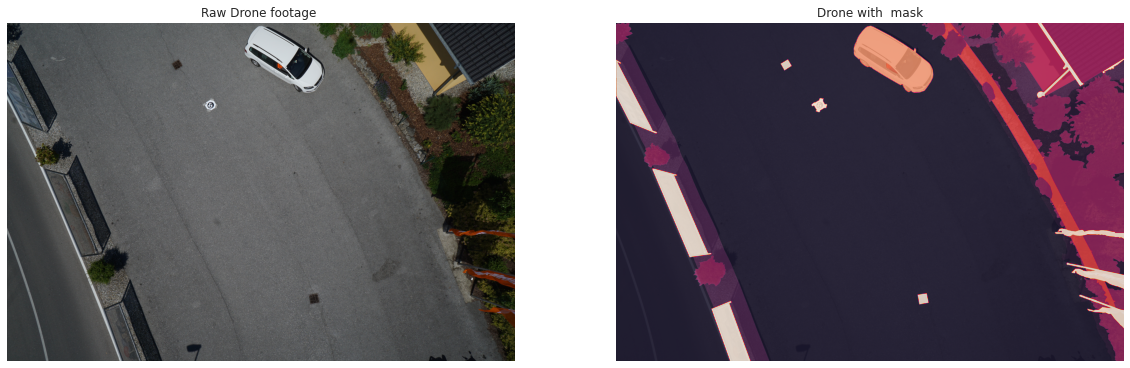

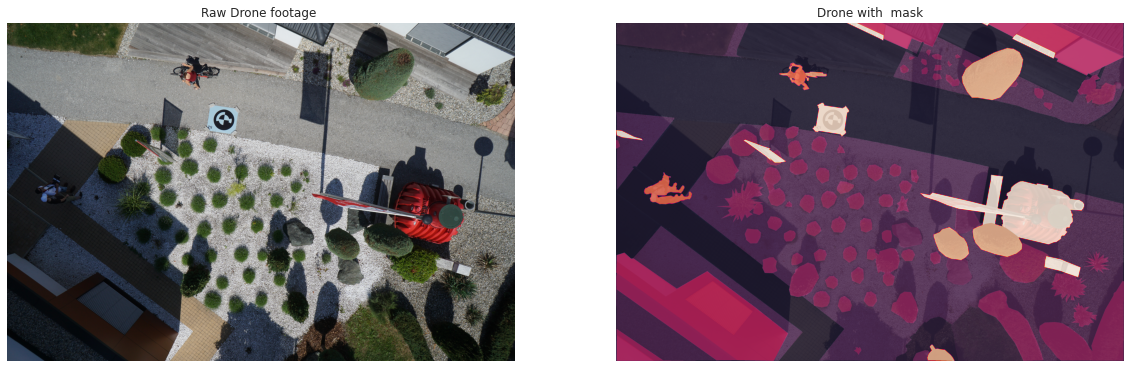

In [8]:
import random
for i in range(5):
    drone_mask(fnames[random.randint(10,280)])

In [9]:
def image_resize_tr(f,index):   # My custom function to process image to jpg and resize to
    name = str(f).split('/')[-1]
    img = PIL.Image.open(f)
    img = img.resize((1800,1200),resample=PIL.Image.BILINEAR).convert('RGB')
    loc = '/kaggle/working/train_small/'+str(name)
    img.save(loc ,quality = 95)

In [10]:
parallel(image_resize_tr,fnames,max_workers=20)

In [11]:
shutil.make_archive('train_small','zip','/kaggle/working/train_small')

'/kaggle/working/train_small.zip'

In [12]:
def image_resize_lb(f,index):   # My custom function to process image to jpg and resize to
    name = str(f).split('/')[-1]
    img = PIL.Image.open(f)
    img = img.resize((1800,1200))
    loc = '/kaggle/working/label_small/'+str(f.stem)+'.png'
    img.save(loc ,quality = 100)

In [13]:
parallel(image_resize_lb,fnames_mask,max_workers=20)

In [14]:
shutil.make_archive('label_small','zip','/kaggle/working/label_small')

'/kaggle/working/label_small.zip'